[DocLink](https://docs.google.com/document/d/1jph_NC3yms2hs2scNkophnZKfZWqq2I7tI20mrVu1ts/edit?usp=sharing)

In [ ]:
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import accuracy_score
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
from sklearn.metrics import confusion_matrix

drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/gdrive


# **Facial Emotion Recognition using Dlib**

**Facial Landmarks extraction using Dlib**

In [ ]:
import dlib 

features = []
d = []
# Load the detector
detector = dlib.get_frontal_face_detector()
# Load the predictor
predictor = dlib.shape_predictor("/content/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat")
for i in range(0,7):
  data_path = '/content/gdrive/MyDrive/ck+/' + str(i) + '/'
  filenames = (os.listdir(data_path))
  for img_name in filenames:
    d.append(i)
    # read the image
    img = cv2.imread(data_path + img_name)
    # Convert image into grayscale
    gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    # Use detector to find landmarks
    faces = detector(gray)
    imgs = []
    for face in faces:
      x1 = face.left() # left point
      y1 = face.top() # top point
      x2 = face.right() # right point
      y2 = face.bottom() # bottom point
    # Create landmark object
      landmarks = predictor(image=gray, box=face)
    # Loop through all the points
      for n in range(17, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        imgs.append([x,y])
      features.append(imgs)
features = np.asarray(features)
d = np.asarray(d)

#for reshaping 3D matrix to 2D matrix
a,b,c = features.shape
features = features.reshape(a,b*c)

In [ ]:
print(features.shape)
print(d.shape)

(327, 102)
(327,)


In [ ]:
features_df = pd.DataFrame(features)
features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,59,81,69,69,85,66,100,69,114,76,143,77,157,70,172,67,187,70,196,81,128,87,129,99,129,112,131,124,114,136,122,138,131,140,140,137,148,135,75,91,...,98,165,110,157,123,153,133,155,142,152,155,155,165,162,155,169,143,173,133,175,123,175,110,172,103,165,123,162,133,162,142,161,160,162,143,162,133,163,123,163
1,53,76,65,64,82,60,99,62,115,68,144,68,159,62,175,59,190,62,200,74,131,87,131,101,131,116,132,131,116,144,124,146,131,148,139,146,146,144,75,91,...,105,176,114,165,125,159,132,161,140,159,150,165,159,176,151,184,141,189,133,189,125,189,114,184,110,175,125,170,132,171,140,170,154,175,141,174,133,175,125,174
2,54,73,67,63,83,60,98,65,113,72,143,71,158,65,174,62,189,66,200,75,127,86,126,100,125,114,125,129,109,143,116,146,124,148,133,146,140,144,74,89,...,93,178,104,169,115,164,123,166,132,164,143,169,155,178,141,183,131,184,122,185,113,184,103,183,98,177,115,172,123,173,132,173,149,177,131,173,122,174,114,173
3,55,77,65,65,81,61,98,61,115,66,138,65,156,60,175,60,192,65,204,77,127,84,127,97,127,109,127,123,108,135,117,137,128,139,138,137,148,136,73,89,...,94,166,105,156,119,150,128,152,138,149,152,156,165,166,154,175,140,177,129,178,119,177,106,174,100,166,119,162,128,163,138,162,159,165,139,162,129,162,119,162
4,51,81,62,68,80,63,98,63,116,69,141,70,158,65,176,64,193,69,204,82,129,86,129,99,129,113,129,127,115,142,122,144,130,145,138,144,145,142,75,92,...,99,176,111,169,122,164,131,167,139,164,151,168,163,175,152,182,140,186,131,187,122,187,111,183,105,176,122,173,131,174,140,173,158,175,140,174,131,175,122,174


In [ ]:
features_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
322,59,76,68,64,83,59,99,61,113,69,139,68,155,62,173,60,190,65,202,76,127,84,127,96,126,108,126,120,112,138,119,140,127,142,135,140,143,138,74,91,...,98,185,105,165,118,157,126,159,135,157,150,166,162,185,151,206,137,215,127,216,117,215,105,205,103,185,118,166,126,166,135,167,157,185,136,202,127,203,118,201
323,58,70,68,58,83,54,99,58,113,65,143,64,158,57,173,54,188,57,198,69,129,87,129,100,130,114,130,129,115,144,122,147,129,149,137,147,143,145,73,91,...,99,190,107,174,120,166,128,168,135,166,147,174,154,191,148,211,135,220,127,222,118,221,105,213,104,190,120,177,128,177,135,177,149,190,135,204,127,205,119,205
324,59,73,70,64,86,63,101,66,115,73,144,73,157,67,171,63,185,64,195,73,130,91,130,102,131,114,131,126,111,136,120,139,130,141,139,139,147,137,75,90,...,101,173,110,161,120,156,128,158,135,156,145,163,153,174,146,190,136,197,127,198,119,197,108,191,106,173,120,165,128,166,135,166,147,174,135,179,127,181,119,180
325,64,79,74,68,88,63,104,64,117,72,139,73,154,68,170,67,185,71,196,82,126,87,124,100,122,114,121,127,110,141,116,144,123,147,132,144,140,142,75,91,...,100,188,104,170,115,162,124,164,134,162,148,172,154,192,149,211,136,220,125,221,115,219,104,208,106,187,116,175,124,175,134,175,149,191,135,201,125,202,115,199
326,56,73,65,59,80,55,95,58,110,65,145,64,159,57,176,54,191,59,200,72,128,87,128,100,128,113,127,126,113,142,120,144,129,145,137,144,145,142,75,91,...,104,188,110,169,122,161,131,163,139,161,152,170,160,188,153,211,141,221,131,222,122,221,110,210,110,188,123,173,131,173,139,172,154,188,140,206,131,207,122,206


In [ ]:
features_df.info

<bound method DataFrame.info of      0    1    2    3    4    5    6    ...  95   96   97   98   99   100  101
0     59   81   69   69   85   66  100  ...  162  143  162  133  163  123  163
1     53   76   65   64   82   60   99  ...  175  141  174  133  175  125  174
2     54   73   67   63   83   60   98  ...  177  131  173  122  174  114  173
3     55   77   65   65   81   61   98  ...  165  139  162  129  162  119  162
4     51   81   62   68   80   63   98  ...  175  140  174  131  175  122  174
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
322   59   76   68   64   83   59   99  ...  185  136  202  127  203  118  201
323   58   70   68   58   83   54   99  ...  190  135  204  127  205  119  205
324   59   73   70   64   86   63  101  ...  174  135  179  127  181  119  180
325   64   79   74   68   88   63  104  ...  191  135  201  125  202  115  199
326   56   73   65   59   80   55   95  ...  188  140  206  131  207  122  206

[327 rows x 102 col

In [ ]:
features_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.00000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,...,327.00000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.00000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,55.923547,77.489297,66.776758,66.149847,82.730887,62.382263,99.345566,64.217125,115.116208,69.828746,141.152905,69.599388,157.015291,63.972477,173.611621,62.290520,189.541284,66.116208,200.529052,76.996942,128.269113,86.17737,128.229358,99.941896,128.168196,113.715596,128.214067,127.963303,111.305810,139.669725,119.504587,142.311927,128.418960,144.571865,137.474006,142.281346,145.608563,139.697248,74.724771,90.807339,...,95.82263,171.428135,106.905199,162.370031,119.327217,158.211009,128.333333,160.397554,137.685015,158.284404,150.495413,162.581040,161.816514,171.522936,150.880734,182.730887,138.477064,188.403670,128.489297,189.437309,118.746177,188.434251,106.577982,182.886850,100.862385,171.284404,119.290520,166.83792,128.360856,167.804281,137.840979,166.862385,156.648318,171.308869,137.905199,176.024465,128.293578,177.296636,119.116208,175.978593
std,2.860289,4.024356,2.624041,4.787400,2.336899,6.095663,2.318207,6.715421,3.023215,6.282318,3.281457,6.339699,2.525285,6.695102,2.453041,6.098225,2.579528,4.776471,2.670834,4.240108,1.578535,2.28204,1.926405,3.053659,2.399993,4.367529,2.903887,5.810283,2.602158,4.374469,2.287431,4.538244,2.340365,4.654327,2.466667,4.494071,2.761421,4.369803,0.938654,0.973360,...,6.11839,10.424438,4.026774,6.987769,2.614253,6.101503,2.296080,6.183869,2.989017,6.104547,4.439001,7.110349,6.246715,10.743464,4.785698,14.143471,3.316430,16.537809,2.571501,16.743323,2.885298,16.452976,4.259152,14.012791,6.075902,10.068561,2.667344,6.47089,2.305913,6.338962,3.012108,6.496532,6.274047,10.355906,3.206618,15.006727,2.405143,15.076922,2.761248,14.955440
min,49.000000,66.000000,61.000000,53.000000,76.000000,46.000000,91.000000,46.000000,104.000000,51.000000,133.000000,52.000000,151.000000,45.000000,168.000000,45.000000,183.000000,51.000000,192.000000,64.000000,122.000000,78.00000,120.000000,90.000000,118.000000,100.000000,116.000000,111.000000,105.000000,128.000000,112.000000,132.000000,120.000000,134.000000,129.000000,131.000000,138.000000,126.000000,72.000000,89.000000,...,80.00000,151.000000,94.000000,148.000000,110.000000,144.000000,120.000000,146.000000,128.000000,144.000000,141.000000,148.000000,149.000000,151.000000,141.000000,163.000000,130.000000,165.000000,121.000000,164.000000,107.000000,164.000000,93.000000,162.000000,85.000000,152.000000,110.000000,153.00000,121.000000,154.000000,128.000000,153.000000,143.000000,153.000000,129.000000,156.000000,121.000000,157.000000,108.000000,155.000000
25%,54.000000,75.000000,65.000000,63.000000,81.000000,59.000000,98.000000,60.000000,113.000000,66.000000,139.000000,66.000000,155.000000,59.500000,172.000000,59.000000,188.000000,63.000000,199.000000,74.000000,127.000000,85.00000,127.000000,98.000000,127.000000,111.000000,126.000000,124.000000,110.000000,136.000000,118.000000,139.000000,127.000000,141.000000,136.000000,139.000000,144.000000,137.000000,74.0

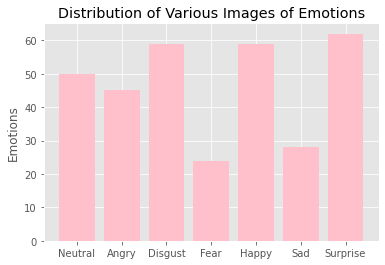

In [ ]:
emotions = ('Neutral', 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise')
a = np.arange(len(emotions))
distribution = [np.count_nonzero(d==0),np.count_nonzero(d==1),np.count_nonzero(d==2),np.count_nonzero(d==3),np.count_nonzero(d==4),np.count_nonzero(d==5),np.count_nonzero(d==6)]
plt.bar(a, distribution, align='center', color='pink')
plt.xticks(a, emotions)
plt.ylabel('Emotions')
plt.title('Distribution of Various Images of Emotions')
plt.show();

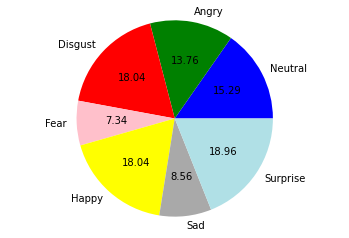

In [ ]:
colors = ['blue','green','red','pink','yellow','darkgray','powderblue']
plt.pie(distribution,
        labels=emotions,
        colors=colors,
        autopct='%.2f')
plt.axis('equal')
plt.show()[

In [ ]:
features,d = SMOTE().fit_resample(features, d)
kf = KFold(n_splits=10, random_state=45, shuffle=True)

x, x_test, y, y_test = train_test_split(features,d,test_size=0.2,train_size=0.8)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

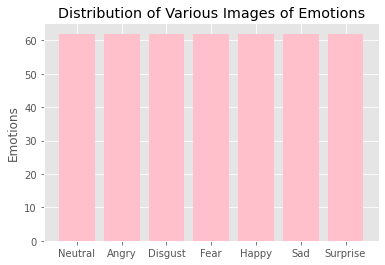

In [ ]:
emotions = ('Neutral', 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise')
a = np.arange(len(emotions))
distribution = [np.count_nonzero(d==0),np.count_nonzero(d==1),np.count_nonzero(d==2),np.count_nonzero(d==3),np.count_nonzero(d==4),np.count_nonzero(d==5),np.count_nonzero(d==6)]
plt.bar(a, distribution, align='center', color='pink')
plt.xticks(a, emotions)
plt.ylabel('Emotions')
plt.title('Distribution of Various Images of Emotions')
plt.show();

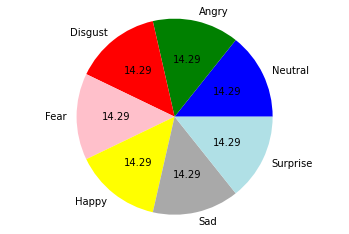

In [ ]:
colors = ['blue','green','red','pink','yellow','darkgray','powderblue']
plt.pie(distribution,
        labels=emotions,
        colors=colors,
        autopct='%.2f')
plt.axis('equal')
plt.show()

**Model Used: KNN**

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
scores = []
for train_index, test_index in kf.split(x):
    X_train, X_cv, y_train, y_cv = x[train_index], x[test_index], y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_cv)
    scores.append(clf.score(X_cv, y_cv))
print(metrics.classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.33      0.67      0.44         3
           2       1.00      0.20      0.33         5
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         4
           5       0.60      0.43      0.50         7
           6       1.00      1.00      1.00         5

    accuracy                           0.68        34
   macro avg       0.76      0.70      0.67        34
weighted avg       0.79      0.68      0.68        34



In [ ]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7586206896551724

**Model used: SVM**

In [ ]:
clf = svm.SVC(kernel='linear',C=1.0)
scores = []
for train_index, test_index in kf.split(x):
    X_train, X_cv, y_train, y_cv = x[train_index], x[test_index], y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_cv)
    scores.append(clf.score(X_cv, y_cv))
print(metrics.classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.75      1.00      0.86         3
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       0.86      0.86      0.86         7
           6       1.00      1.00      1.00         5

    accuracy                           0.88        34
   macro avg       0.89      0.89      0.88        34
weighted avg       0.90      0.88      0.88        34



In [ ]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8850574712643678

**Model Used: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scores = []
clf = RandomForestClassifier(max_depth=3, random_state=0)
for train_index, test_index in kf.split(x):
    X_train, X_cv, y_train, y_cv = x[train_index], x[test_index], y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_cv)
    scores.append(clf.score(X_cv, y_cv))
print(metrics.classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.43      1.00      0.60         3
           2       1.00      0.60      0.75         5
           3       0.71      0.83      0.77         6
           4       1.00      0.75      0.86         4
           5       0.67      0.57      0.62         7
           6       1.00      1.00      1.00         5

    accuracy                           0.71        34
   macro avg       0.73      0.71      0.70        34
weighted avg       0.75      0.71      0.71        34



In [ ]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7011494252873564

**Model Used: K Means Clustering**

In [ ]:
from sklearn.cluster import MiniBatchKMeans
X_train, X_test, y_train, y_test = train_test_split(features, d, test_size=0.20, random_state=100)
clf = MiniBatchKMeans(n_clusters=7, random_state=0)
clf.fit(X_train)

def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}
  for i in range(kmeans.n_clusters):
    # find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)

    # append actual labels for each point in cluster
    labels.append(actual_labels[index])

    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    #print(labels)
    #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
  return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
    for key, value in cluster_labels.items():
      if cluster in value:
        predicted_labels[i] = key
            
  return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(clf, y_train)
X_clusters = clf.predict(X_test)
y_pred = infer_data_labels(X_clusters, cluster_labels)
print(np.unique(clf.labels_))
print(metrics.classification_report(y_test, y_pred))

[0 1 2 3 4 5 6]
              precision    recall  f1-score   support

           0       0.42      0.62      0.50        13
           1       0.00      0.00      0.00         8
           2       0.48      0.69      0.56        16
           3       0.67      0.92      0.77        13
           4       0.85      0.69      0.76        16
           5       0.33      0.11      0.17         9
           6       1.00      0.92      0.96        12

    accuracy                           0.62        87
   macro avg       0.54      0.56      0.53        87
weighted avg       0.58      0.62      0.58        87



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comparing Algorithms**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.729355 (0.058194)
RF: 0.732688 (0.030743)
SVM: 0.907312 (0.044620)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


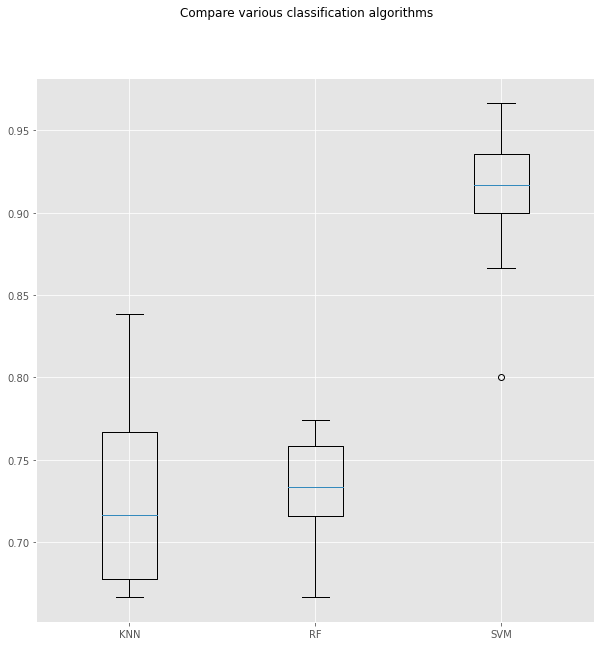

In [ ]:
    # loading libraries
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.model_selection import train_test_split

    plt.style.use('ggplot')
    seed = 50
    # loading datasets
    X_train, X_test, y_train, y_test = train_test_split(features, d, test_size=0.30)
    kfold = model_selection.KFold(n_splits=10, random_state=50)
    
    # preparing models
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
    models.append(('RF', RandomForestClassifier(max_depth=3, random_state=0)))
    models.append(('SVM', svm.SVC(kernel='linear')))    
    # evaluating each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
         kfold = model_selection.KFold(n_splits=10, random_state=seed)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)
        
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Compare various classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

**KNN from Scratch**

In [ ]:
import numpy as np


class KNearestNeighbor:
    def __init__(self, k):
        self.k = k
        

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test, num_loops=0):
        if num_loops == 0:
            distances = self.compute_distance_vectorized(X_test)

        elif num_loops == 1:
            distances = self.compute_distance_one_loop(X_test)

        else:
            distances = self.compute_distance_two_loops(X_test)

        return self.predict_labels(distances)

    def compute_distance_two_loops(self, X_test):

        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            for j in range(num_train):
                distances[i, j] = np.sqrt(
                    self.eps + np.sum((X_test[i, :] - self.X_train[j, :]) ** 2)
                )

        return distances

    def compute_distance_one_loop(self, X_test):
        """
        Much better than two-loops but not as fast as fully vectorized version.
        Utilize Numpy broadcasting in X_train - X_test[i,:]
        """
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            distances[i, :] = np.sqrt(
                np.sum((self.X_train - X_test[i, :]) ** 2, axis=1)
            )

        return distances

    def compute_distance_vectorized(self, X_test):
        X_test_squared = np.sum(X_test ** 2, axis=1, keepdims=True)
        X_train_squared = np.sum(self.X_train ** 2, axis=1, keepdims=True)
        two_X_test_X_train = np.dot(X_test, self.X_train.T)
        return np.sqrt(
            self.eps + X_test_squared - 2 * two_X_test_X_train + X_train_squared.T
        )

    def predict_labels(self, distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            y_indices = np.argsort(distances[i, :])
            k_closest_classes = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred

KNN = KNearestNeighbor(k=10)
KNN.train(X_train, y_train)
y_pred = KNN.predict(X_test, num_loops=0)
print(f"Accuracy: {sum(y_pred == y_test) / y_test.shape[0]}")


Accuracy: 0.7022900763358778
